# Keras_basics

#### Author: Srikanth KS, *gmail at sri dot teach*
This notebook gives headstart with keras library. Wine dataset is analysed, primarily on the lines of this blog post: https://www.datacamp.com/community/tutorials/deep-learning-python. Documented minimally, this quick and not so clean , just for later reference!

In [86]:
# import necessary libraries

import pandas                  as     pd
from   ggplot                  import *
import matplotlib.pyplot       as     plt
import seaborn                 as     sns
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler
from   keras.models            import Sequential
from   keras.layers            import Dense
from   sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics           import confusion_matrix
from sklearn.metrics           import precision_score
from sklearn.metrics           import recall_score
from sklearn.metrics           import f1_score
from sklearn.metrics           import cohen_kappa_score

In [87]:
# read data and summarize

baseurl = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
white   = pd.read_csv(baseurl + "winequality-white.csv", sep = ';')
red     = pd.read_csv(baseurl + "winequality-red.csv",   sep = ';')

print(white.info())
# print(red.info())
# print(white.describe())
# print(red.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


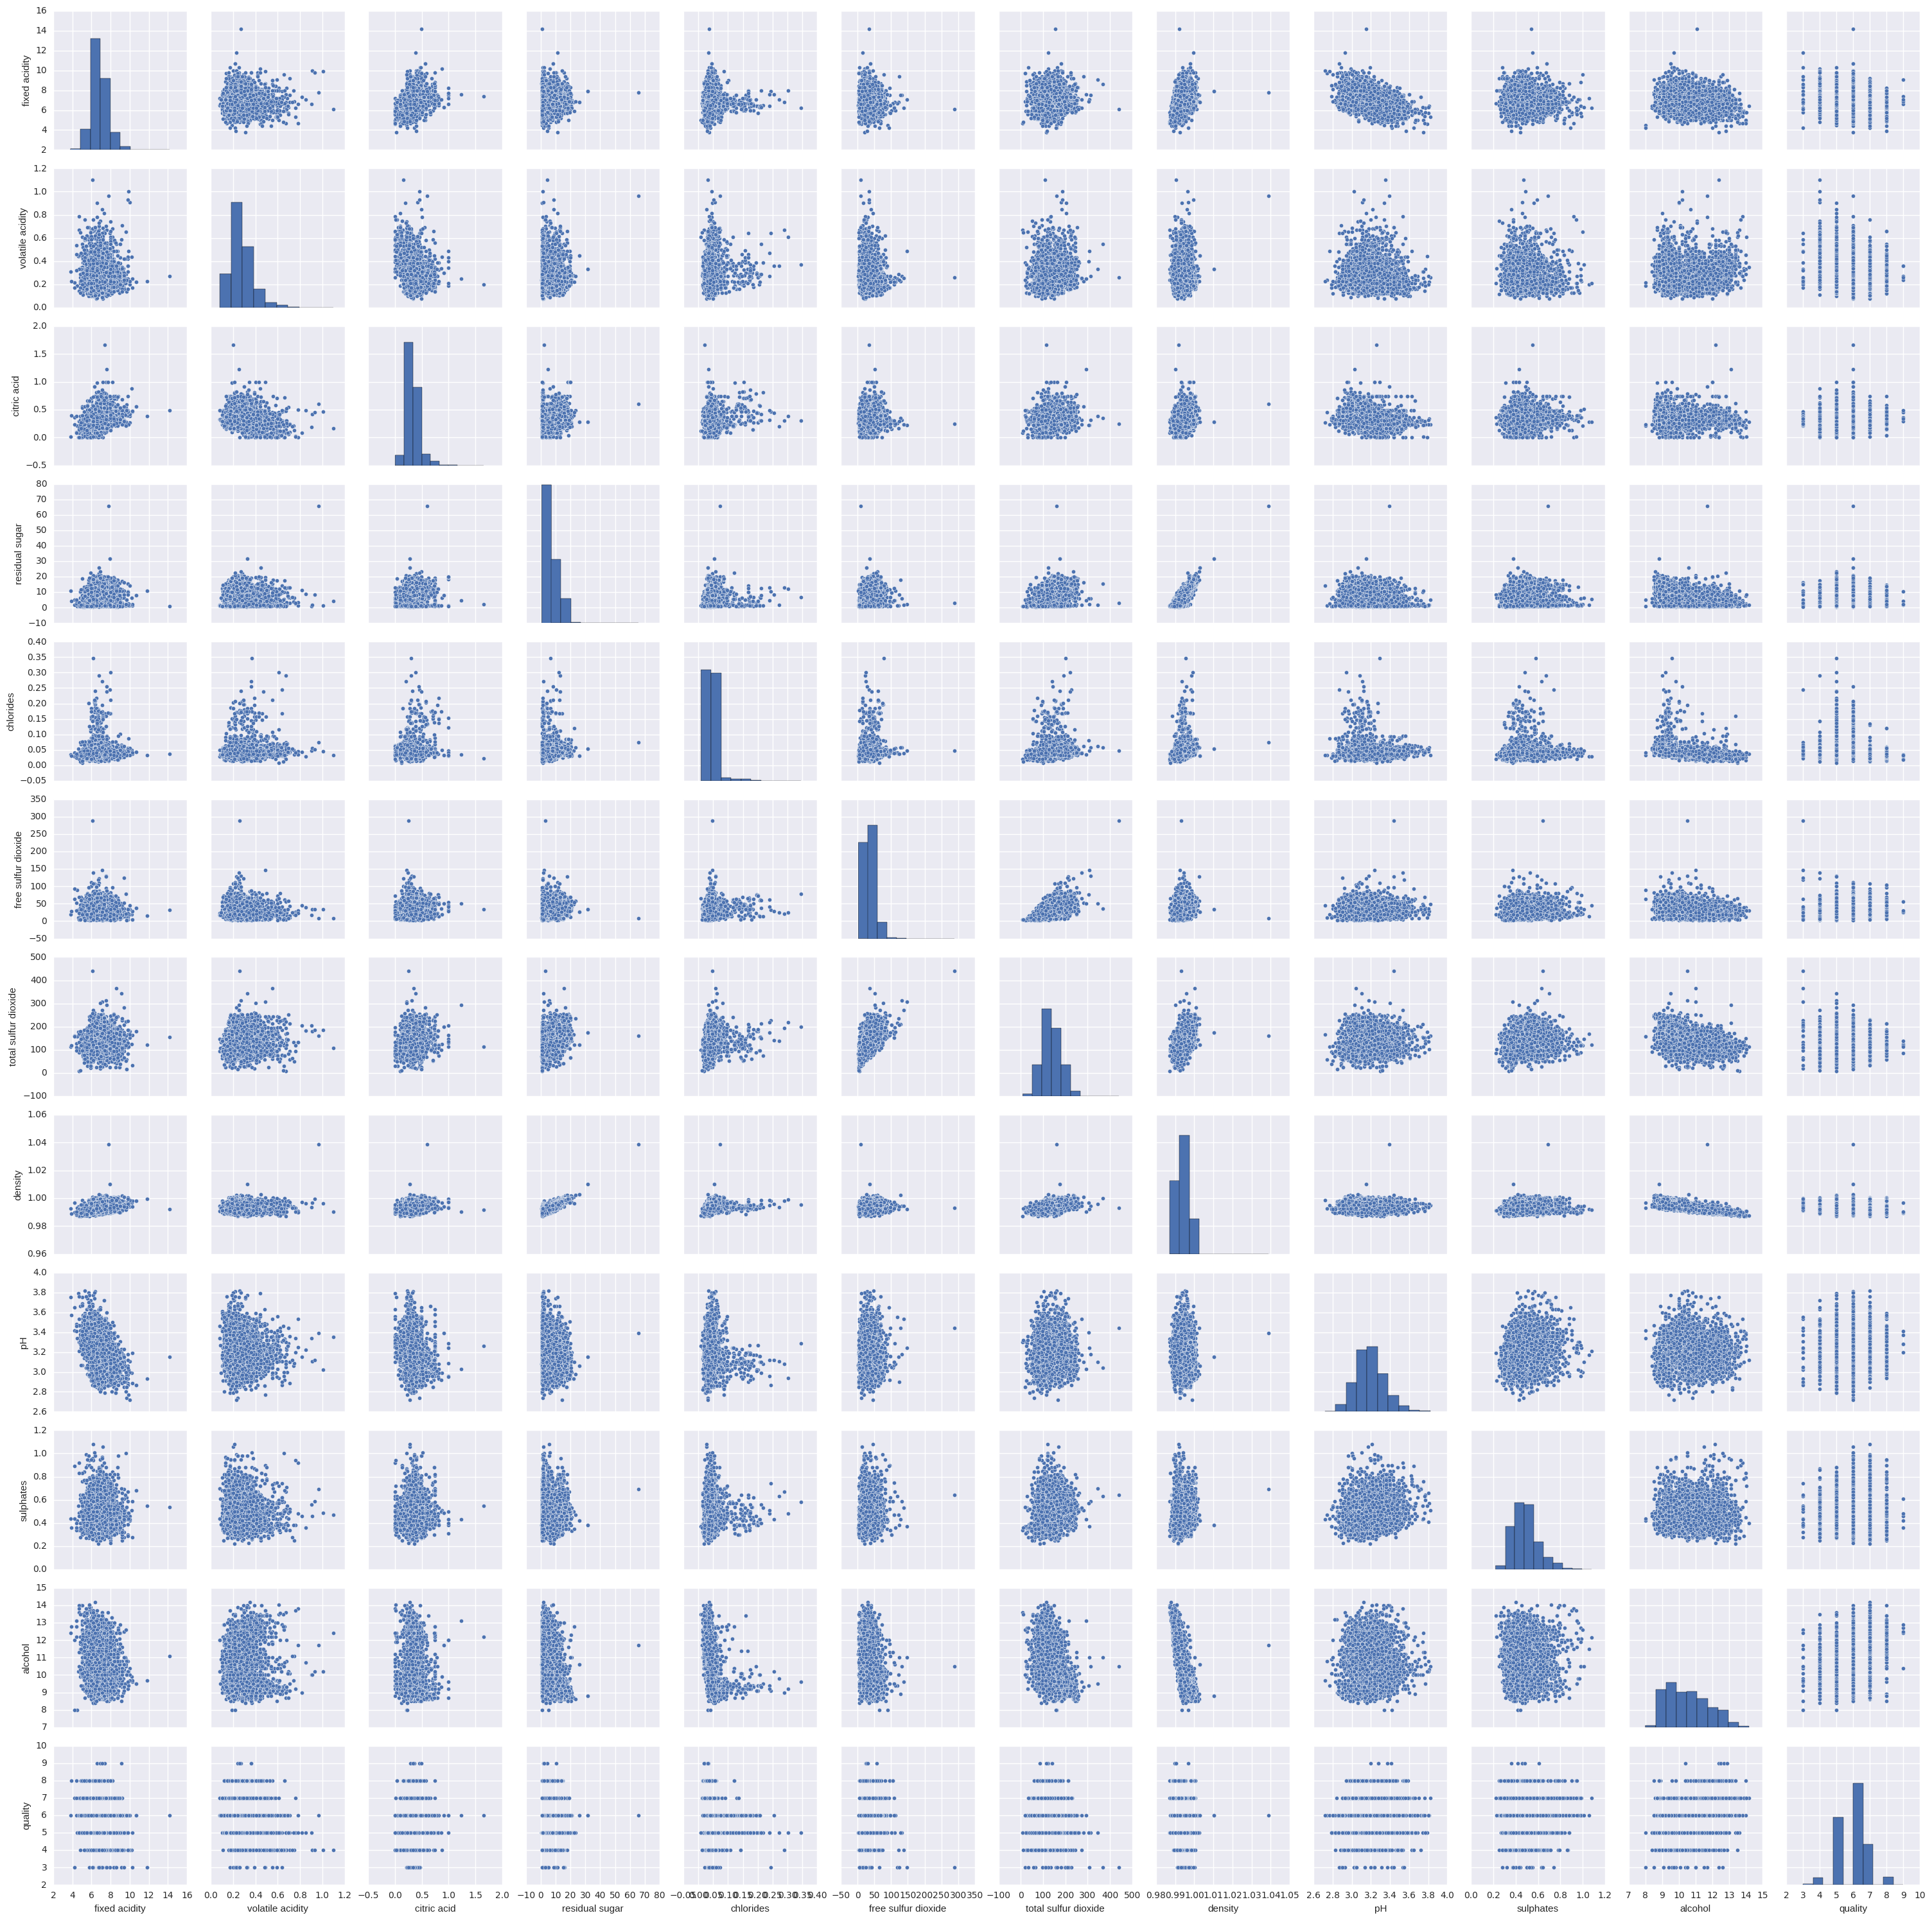

In [88]:
# pairwise plot for 'white'

%matplotlib inline
sns.pairplot(white)

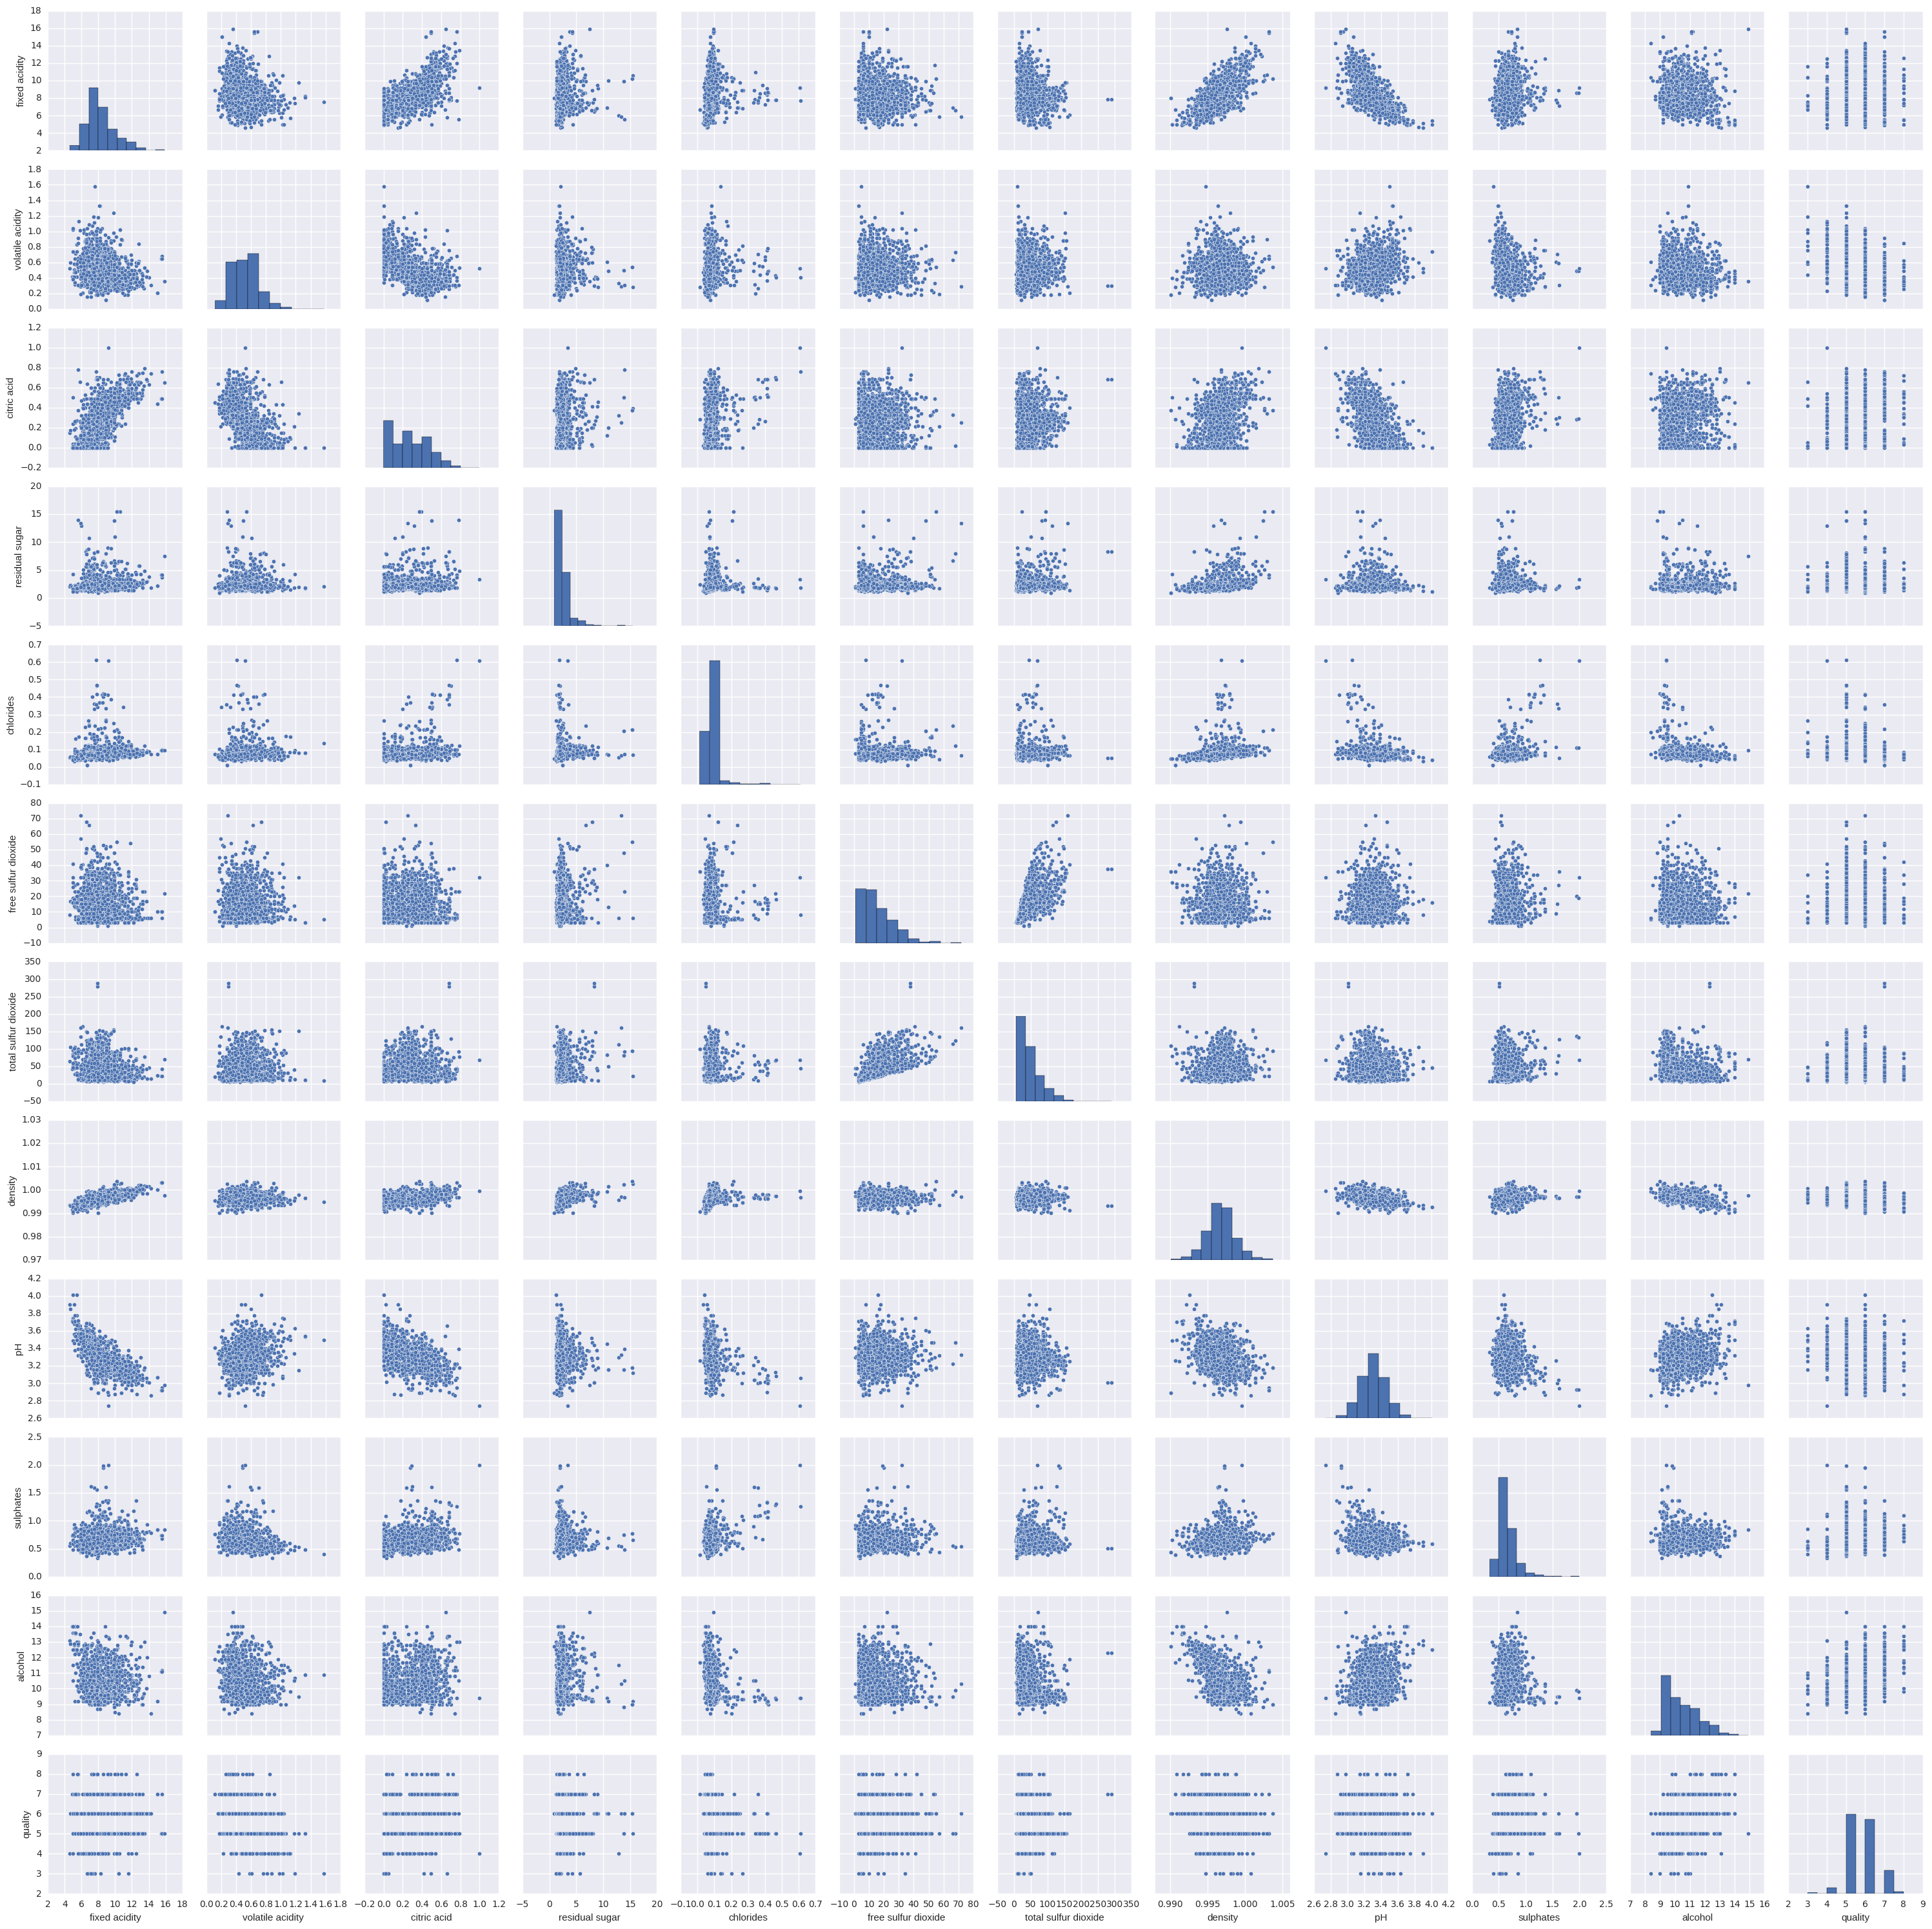

In [89]:
# pairwise plot for 'red'

%matplotlib inline
sns.pairplot(red)
# seems to show a predictable pattern for 'fixed acidity' versus 'density' as compared to white

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


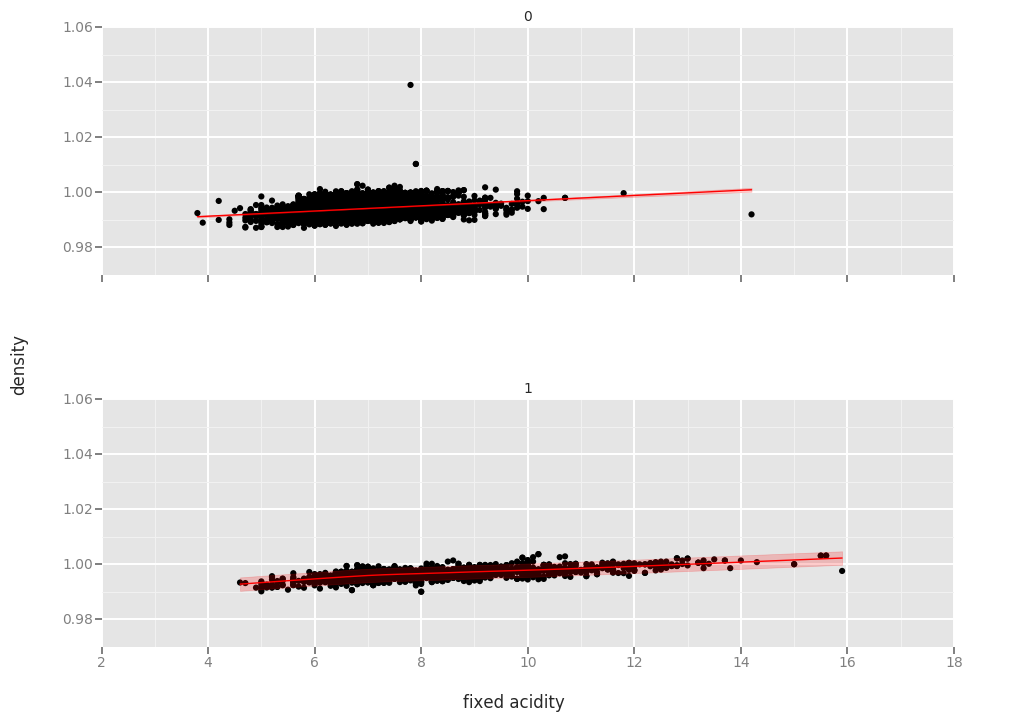

<ggplot: (8758192696877)>

In [90]:
# combine datasets and visualize

red['type']   = 1
white['type'] = 0
wines         = red.append(white, ignore_index=True)

wines.info()

ggplot(aes(x='fixed acidity', y='density'), data = wines) +\
    geom_point() +\
    stat_smooth(color = 'red') +\
    facet_wrap('type')

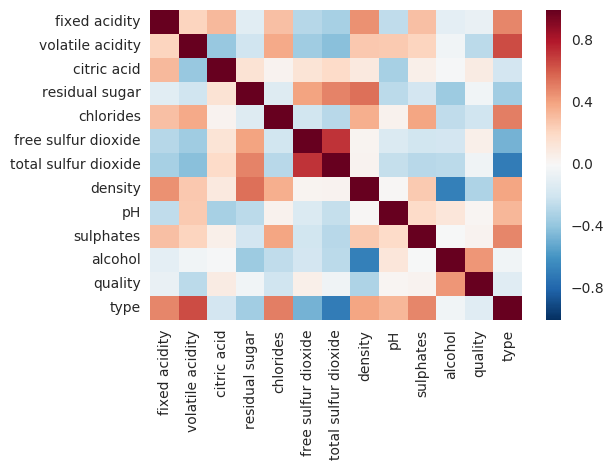

In [91]:
# look at correlation matrix

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

In [92]:
# test and train split 

X = wines.ix[:,0:11]
y = np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [93]:
# scale the data

scaler  = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [94]:
# set up the keras model

model = Sequential()                                         # Initialize keras model
model.add(Dense(12, activation = 'relu', input_shape=(11,))) # Add an input layer
model.add(Dense(8, activation  = 'relu'))                    # Add one hidden layer
model.add(Dense(1, activation  = 'sigmoid'))                 # Add an output layer

In [95]:
# look at model summary

model.summary()     # Model summary
model.get_config()  # Model config
model.get_weights() # List all weight tensors

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.03959179, -0.35063189,  0.16805166, -0.45907399, -0.15894184,
         -0.2494964 , -0.32885724, -0.2275413 ,  0.12289608, -0.21395397,
         -0.3073974 ,  0.04413402],
        [-0.22700623,  0.13963783,  0.32957155,  0.39968479, -0.12256804,
          0.16096801,  0.13777608, -0.30074504,  0.44192159, -0.31482518,
          0.2081331 ,  0.17096585],
        [-0.0680984 ,  0.45451027, -0.2244938 , -0.49000317, -0.27972347,
         -0.20155856,  0.42402679, -0.43563873, -0.21070117, -0.47838563,
         -0.49210802, -0.45533007],
        [-0.31840932,  0.06723464,  0.23361206, -0.45476115,  0.09071827,
         -0.43123627,  0.17900264,  0.38561523, -0.38972425,  0.48512673,
         -0.18698582, -0.0083999 ],
        [-0.39807361, -0.08474064, -0.1759572 ,  0.38254374, -0.10279   ,
         -0.21508804, -0.16111621, -0.29924151,  0.20692265,  0.17008543,
          0.26009154, -0.01738679],
        [ 0.36916274,  0.42699951,  0.42965883,  0.18527782, -0.10988659,
      

In [96]:
# compile and fit

model.compile(loss        = 'binary_crossentropy' # for two class classification
              , optimizer = 'adam'                # is a SGD variant
              , metrics   = ['accuracy'])         
                   
model.fit(X_train
          , y_train
          , epochs     = 20                       # seems to reach stability around this
          , batch_size = 1                        # send single row at a time
          , verbose    = 1
         )

Epoch 1/20
4352/4352 [==============================] - 3s - loss: 0.0752 - acc: 0.9729     00e+00  51/4352 [..............................] - ETA: 7s - loss: 0.5782 - acc: 0.6863      

In [97]:
# predict

y_pred = np.round(model.predict(X_test))
print(y_pred)

[[ 0.]
 [ 1.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


In [98]:
# compare actual versus test to obtain 'loss' and 'accuracy'

score = model.evaluate(X_test, y_test,verbose = 1)
print("\n")
print(["loss", "accuracy"])
print(score)

  32/2145 [..............................] - ETA: 1s

['loss', 'accuracy']
[0.028386010442710361, 0.99533799533799538]


In [99]:
# Confusion matrix
print("\nConfusion matrix")
print( confusion_matrix(y_test, y_pred) ) 
       
# Precision 
print("\nPrecision")
print( precision_score(y_test, y_pred) )
0.994565217391

# Recall
print("\nRecall")
print( recall_score(y_test, y_pred) ) 
0.98563734290843807

# F1 score
print("\nF1 score")
print( f1_score(y_test,y_pred) )
0.99008115419296661

# Cohen's kappa
print("\nCohen's kappa")
print( cohen_kappa_score(y_test, y_pred) )


Confusion matrix
[[1586    2]
 [   8  549]]

Precision
0.996370235935

Recall
0.985637342908

F1 score
0.990974729242

Cohen's kappa
0.987832175925


In [100]:
# lets see how it compares with randomforest

rf_model = RandomForestClassifier(n_estimators   = 500   # number of trees
                                  , verbose      = 1     
                                  , oob_score    = True
                                  , random_state = 1
                                 )
rf_model.fit(X_train, y_train)
print("\noob score")
print(rf_model.oob_score_)

print("\ntest score")
print(rf_model.score(X_test, y_test))

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished



oob score
0.993795955882

test score
0.994871794872


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


A lot of things can be done further, but that is for a different day!